In [1]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

2022-04-06 12:55:02.636975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-06 12:55:02.637002: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline


print("Training data shape : " ,X_train.shape,y_train.shape)

print("Test data shape : " ,X_test.shape,y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Test data shape :  (10000, 28, 28) (10000,)


In [3]:
classes = np.unique(y_train)
nclasses = len(classes)

print('total outputs : ',nclasses)

print('output classes : ',classes)

total outputs :  10
output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'testing data : 9')

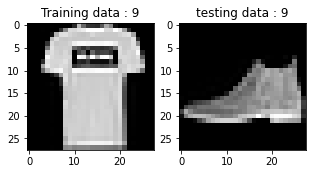

In [4]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(X_train[1,:,:] ,cmap = 'gray')
plt.title("Training data : {}".format(y_train[0]))

plt.subplot(122)
plt.imshow(X_test[0,:,:] , cmap = 'gray')
plt.title("testing data : {}".format(y_test[0]))

In [5]:
X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.reshape(-1,28,28,1)

X_train.shape , X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.
X_test = X_test/255.

In [7]:
y_train_one = to_categorical(y_train)

y_test_one = to_categorical(y_test)

print("Label :" ,y_train[0])

print("After Conversion : ",y_train_one[0])

Label : 9
After Conversion :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_valid,train_label,valid_label = train_test_split(X_train,y_train_one,test_size=0.2,random_state=12) 

In [9]:
X_train.shape,X_valid.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import LeakyReLU

In [11]:
batch_size = 128
epochs = 25
num_classes = 10

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(64,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(128,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation = 'softmax'))

2022-04-06 12:55:05.756089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-06 12:55:05.756117: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-06 12:55:05.756134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (01HW1825674): /proc/driver/nvidia/version does not exist
2022-04-06 12:55:05.756319: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                        

In [15]:
model_history = model.fit(X_train,train_label,batch_size=batch_size,epochs = epochs,validation_data=(X_valid,valid_label))

Epoch 1/25
375/375 [==============================] - 35s 91ms/step - loss: 0.6603 - accuracy: 0.7533 - val_loss: 0.3828 - val_accuracy: 0.8612
Epoch 2/25
375/375 [==============================] - 34s 90ms/step - loss: 0.3972 - accuracy: 0.8561 - val_loss: 0.3100 - val_accuracy: 0.8861
Epoch 3/25
375/375 [==============================] - 34s 90ms/step - loss: 0.3419 - accuracy: 0.8739 - val_loss: 0.2807 - val_accuracy: 0.8962
Epoch 4/25
375/375 [==============================] - 34s 90ms/step - loss: 0.3116 - accuracy: 0.8859 - val_loss: 0.2574 - val_accuracy: 0.9054
Epoch 5/25
375/375 [==============================] - 34s 90ms/step - loss: 0.2901 - accuracy: 0.8932 - val_loss: 0.2482 - val_accuracy: 0.9094
Epoch 6/25
375/375 [==============================] - 34s 90ms/step - loss: 0.2708 - accuracy: 0.9003 - val_loss: 0.2419 - val_accuracy: 0.9122
Epoch 7/25
375/375 [==============================] - 34s 91ms/step - loss: 0.2614 - accuracy: 0.9018 - val_loss: 0.2221 - val_accuracy:

In [16]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 432x288 with 0 Axes>

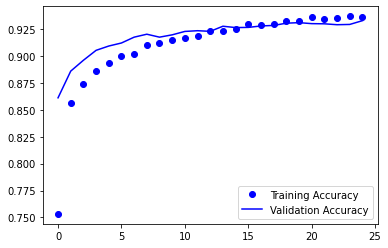

<Figure size 432x288 with 0 Axes>

In [17]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs , accuracy , 'bo', label = 'Training Accuracy' )
plt.plot(epochs , val_accuracy , 'b', label = 'Validation Accuracy' )
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

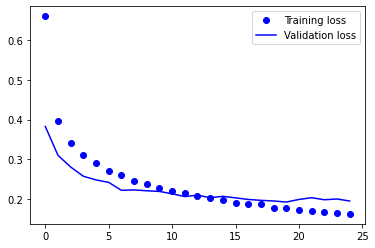

<Figure size 432x288 with 0 Axes>

In [18]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs , loss , 'bo', label = 'Training loss' )
plt.plot(epochs , val_loss , 'b', label = 'Validation loss' )
plt.legend()
plt.figure()

In [19]:
test_set = model.evaluate(X_test,y_test_one)

313/313 [==============================] - 3s 8ms/step - loss: 0.2225 - accuracy: 0.9223


In [21]:
print("Test Loss : ",test_set[0])
print("Test Accuracy :",test_set[1])

Test Loss :  0.22250443696975708
Test Accuracy : 0.9222999811172485
